In [3]:
import re
import datetime
import calendar
from math import sqrt

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
import warnings
warnings.filterwarnings('ignore')

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import seaborn as sns
sns.set_style('ticks')
import warnings
warnings.filterwarnings('ignore')

In [6]:
def parse_date_string(x):
    dt_obj = datetime.datetime.strptime(x, "%b-%y")
    day=calendar.monthrange(dt_obj.year, dt_obj.month)[1]
    last_date = '{}'.format(day)+datetime.datetime.strftime(dt_obj, "-%m-%Y")
    return datetime.datetime.strptime(last_date, "%d-%m-%Y")
df = pd.read_csv('Storage_data.csv')
display(df.head())

,Months,Storage
0,Jan-19,790GB
1,Feb-19,1422GB
2,Mar-19,1580GB
3,Apr-19,2054GB
4,May-19,1896GB


In [7]:
#Change Months column from string to datetime format
df['Months'] = df['Months'].apply(lambda x: parse_date_string(x))

df.set_index('Months', inplace=True)

#Change the Price Column to integers
df['Storage']=df['Storage'].apply(lambda x:float(re.match(r'[0-9]*', x).group()))
df

,Storage
Months,
2019-01-31,790.0
2019-02-28,1422.0
2019-03-31,1580.0
2019-04-30,2054.0
2019-05-31,1896.0
2019-06-30,2370.0
2019-07-31,3002.0
2019-08-31,3792.0
2019-09-30,4108.0


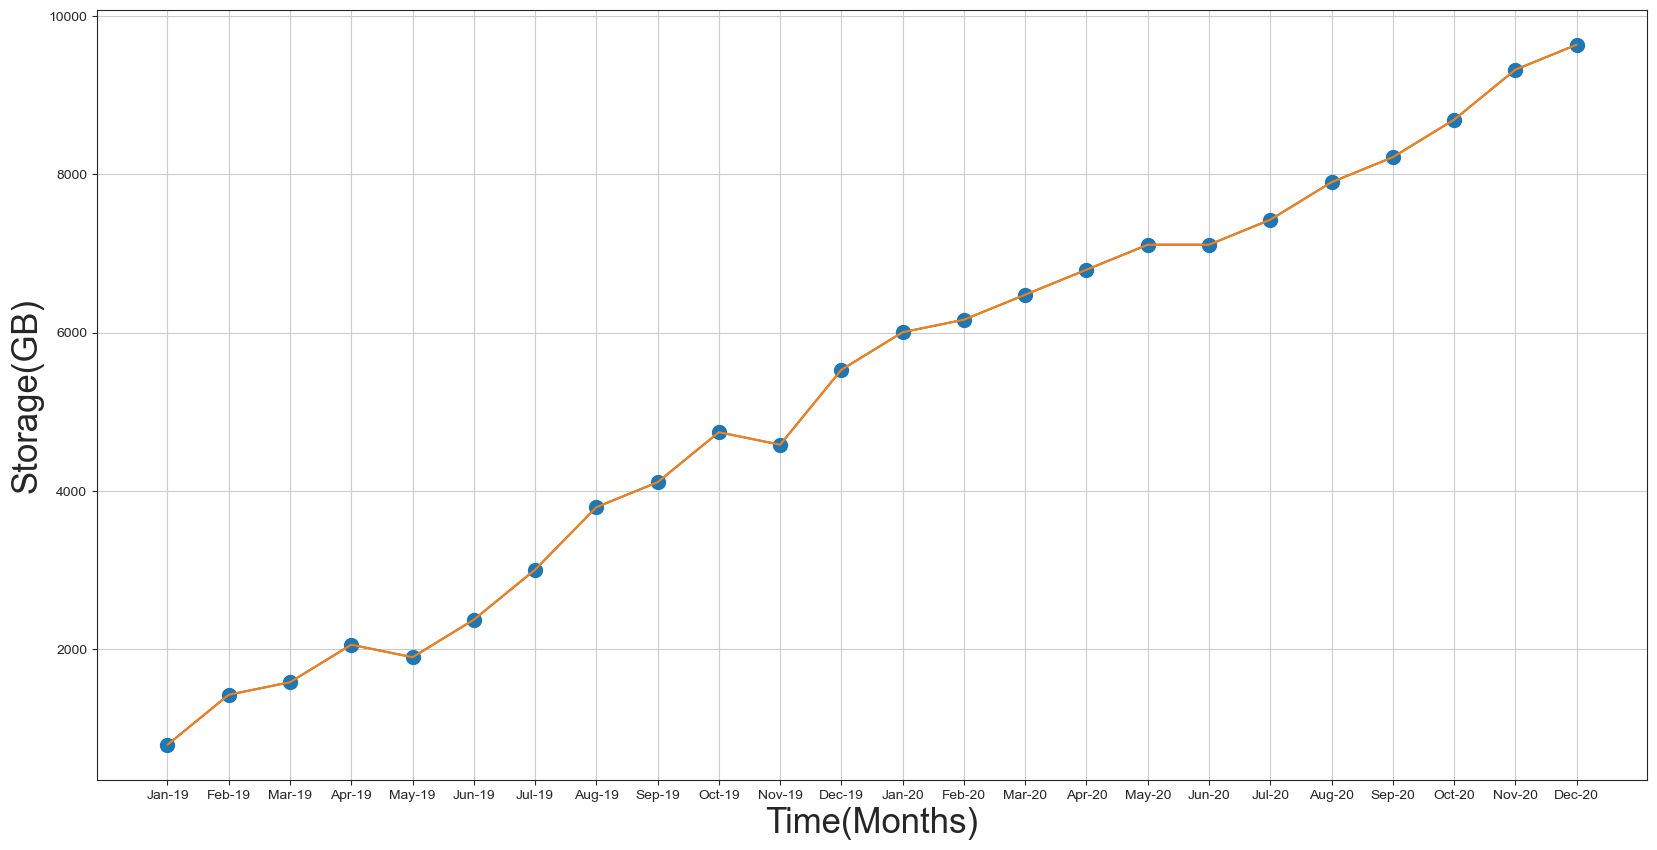

In [8]:
fig = plt.figure(figsize=(20,10))
plt.xlabel('Time(Months)', fontsize=25)
plt.ylabel('Storage(GB)', fontsize=25)
plt.grid()
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Storage'], '-o', markersize=10)
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Storage'], )
plt.savefig('Storagetest.jpeg')
plt.show()

In [9]:
n_obs = df.shape[0]

train_split_percentage = 0.85

train_data = df.iloc[:round(n_obs * train_split_percentage)]
test_data = df.iloc[round(n_obs * train_split_percentage):]
# Display the Test and train data
print(train_data.shape)
print(test_data.shape)

(20, 1)
(4, 1)


In [10]:
display(train_data.tail())
display(test_data.head())

,Storage
Months,
2020-04-30,6794.0
2020-05-31,7110.0
2020-06-30,7110.0
2020-07-31,7426.0
2020-08-31,7900.0


,Storage
Months,
2020-09-30,8216.0
2020-10-31,8690.0
2020-11-30,9322.0
2020-12-31,9638.0


<Axes: xlabel='Months', ylabel='Storage(GB)'>

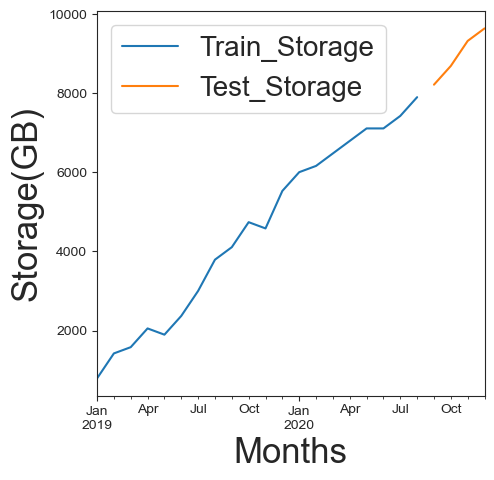

In [11]:
plt.figure(figsize=(5,5))
plt.xlabel('Time(Time Duration)', fontsize=25)
plt.ylabel('Storage(GB)', fontsize=25)
plt.rc('legend',fontsize=20)
train_data['Storage'].rename('Train_Storage').plot(legend=True)
test_data['Storage'].rename('Test_Storage').plot(legend=True)

In [12]:
from statsmodels.tsa.stattools import adfuller
adf_test_result = adfuller(df['Storage'])
adf_test_result

(-0.056758529003104775,
 0.9535788295314206,
 1,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 198.539120180961)

In [13]:
adftest_result = pd.Series(adf_test_result[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result

Adf test statistic        -0.056759
p-value                    0.953579
number of lags             1.000000
number of observations    22.000000
dtype: float64

In [14]:
from statsmodels.tsa.statespace.tools import diff
df['Storage'].head()

Months
2019-01-31     790.0
2019-02-28    1422.0
2019-03-31    1580.0
2019-04-30    2054.0
2019-05-31    1896.0
Name: Storage, dtype: float64

In [15]:
df['Storage'].shift(1).head()

Months
2019-01-31       NaN
2019-02-28     790.0
2019-03-31    1422.0
2019-04-30    1580.0
2019-05-31    2054.0
Name: Storage, dtype: float64

In [16]:
diff(df['Storage'], k_diff=1)

Months
2019-02-28    632.0
2019-03-31    158.0
2019-04-30    474.0
2019-05-31   -158.0
2019-06-30    474.0
2019-07-31    632.0
2019-08-31    790.0
2019-09-30    316.0
2019-10-31    632.0
2019-11-30   -158.0
2019-12-31    948.0
2020-01-31    474.0
2020-02-29    158.0
2020-03-31    316.0
2020-04-30    316.0
2020-05-31    316.0
2020-06-30      0.0
2020-07-31    316.0
2020-08-31    474.0
2020-09-30    316.0
2020-10-31    474.0
2020-11-30    632.0
2020-12-31    316.0
Name: Storage, dtype: float64

<Axes: xlabel='Months'>

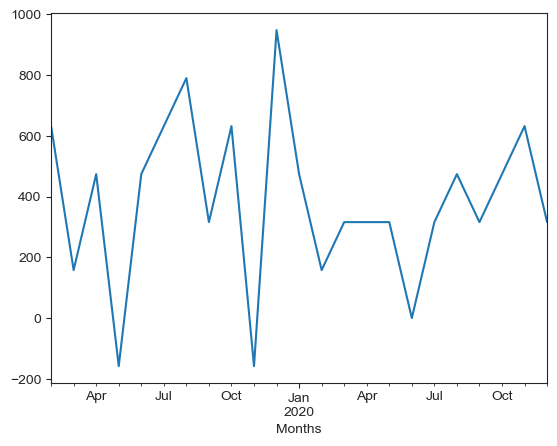

In [17]:
diff(df['Storage'], k_diff=1).plot()

In [18]:
adf_test_result_new = adfuller(diff(df['Storage'], k_diff=1))
adf_test_result_new

(-6.013392146742881,
 1.554144824807133e-07,
 0,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 180.10235100126562)

In [19]:
adftest_result_new = pd.Series(adf_test_result_new[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result_new

Adf test statistic       -6.013392e+00
p-value                   1.554145e-07
number of lags            0.000000e+00
number of observations    2.200000e+01
dtype: float64

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

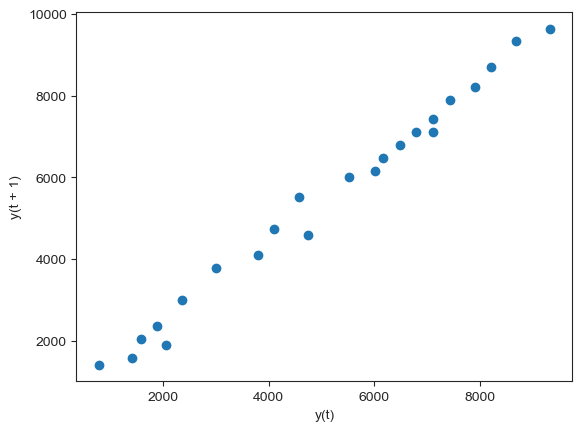

In [20]:
from pandas.plotting import lag_plot
#still very high positive correlation
lag_plot(df['Storage'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

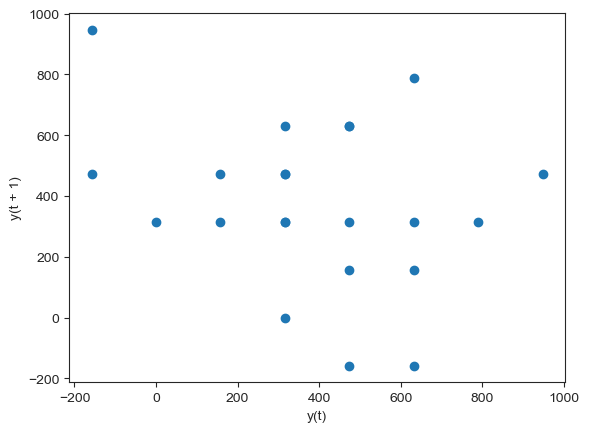

In [21]:
#And now here there is no correlation, since we have taken differencing of the series with a lag of 1
lag_plot(diff(df['Storage'], k_diff=1))

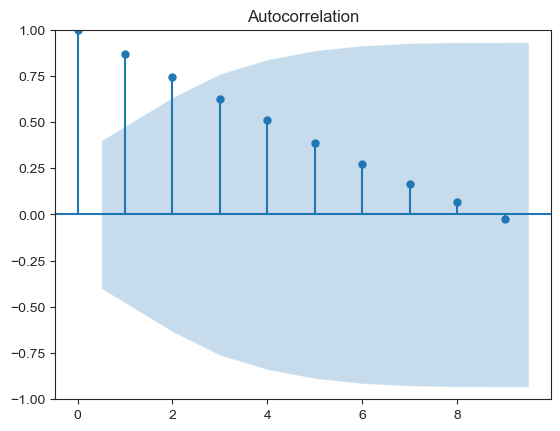

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Storage'], lags=9);

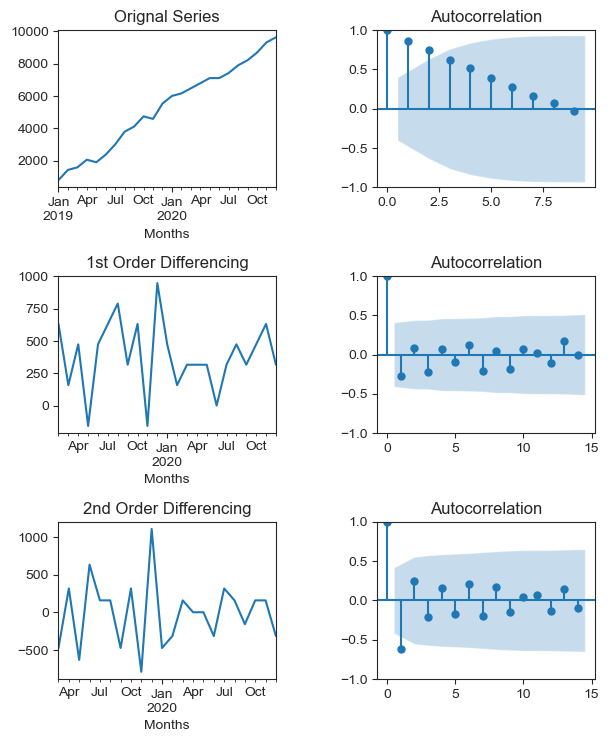

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,8))

fig.tight_layout(pad=4.5)

df['Storage'].plot(ax=axs[0,0], title="Orignal Series")
plot_acf(df['Storage'], lags=9, title="Autocorrelation", ax=axs[0][1])

diff(df['Storage'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_acf(diff(df['Storage'], k_diff=1), title="Autocorrelation", ax=axs[1][1])

diff(df['Storage'], k_diff=2).plot(ax=axs[2,0], title="2nd Order Differencing")
plot_acf(diff(df['Storage'], k_diff=2), title="Autocorrelation", ax=axs[2][1])
plt.savefig('Storagetest2.jpeg')
plt.show()

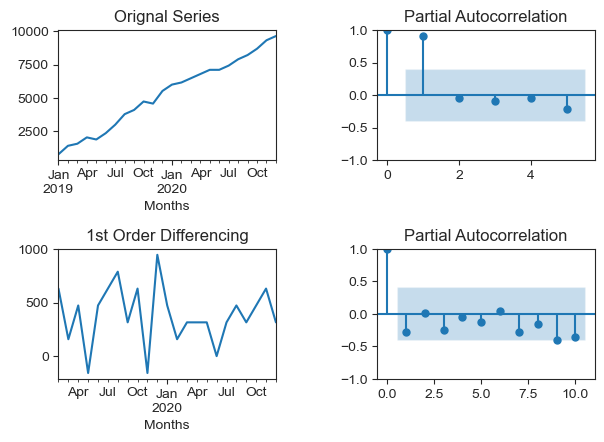

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7,5))

fig.tight_layout(pad=4.5)

df['Storage'].plot(ax=axs[0,0], title="Orignal Series")
plot_pacf(df['Storage'], lags=5, title="Partial Autocorrelation", ax=axs[0][1])

diff(df['Storage'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_pacf(diff(df['Storage'], k_diff=1), lags=10, title="Partial Autocorrelation", ax=axs[1][1])
plt.savefig('Storagetest.jpeg')
plt.show()

In [26]:
from pmdarima import auto_arima
x = auto_arima(train_data['Storage'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=278.199, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=272.898, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=273.377, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=273.346, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=289.822, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=274.868, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.419 seconds


In [28]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['Storage'], order=(0, 1, 0))

model_fit = model.fit()
model_fit.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Storage   No. Observations:                   20
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -143.911
Date:                Mon, 15 Apr 2024   AIC                            289.822
Time:                        12:26:12   BIC                            290.766
Sample:                    01-31-2019   HQIC                           289.982
                         - 08-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.216e+05   9.86e+04      2.248      0.025    2.84e+04    4.15e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.18   Prob(JB):                         0.92
Heteroskedasticity (H):               0.48   Skew:                            -0.13
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""